# <img src="https://img.icons8.com/dusk/64/000000/mind-map.png" style="height:50px;display:inline"> CS 236756 - Technion - Intro to Machine Learning
---
#### Tal Daniel

## Tutorial 12 - Support Vectors Machine (SVM)
---

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* [Motivation](#-Motivation)
* [Linear SVM](#-Linear-SVM)
    * [Hard Margin SVM (Linearly Separable Case)](#-Large-(Maximal)-Margin-Classifier---Hard-SVM---The-Linearly-Separable-Case)
    * [Soft Margin SVM (Linearly Inseparable Case)](#-Soft-Margin-Classification---Soft-SVM---The-Linearly-Inseparable-Case)
    * [Example](#-Linear-SVM-Example)
* [The Dual Problem](#-The-Dual-Problem)
* [Nonlinear SVM - Kernels](#-Nonlinear-SVM---Kernel-SVM)
    * [The Kernel Trick](#-The-Kernel-Trick)
        * [Kernel Functions Examples](#-The-Kernel-Trick---Polynomial-Kernel-Example)
    * [Training and Predicting Using Kernel SVM](#-Training-and-Predicting-Using-Kernel-SVM)
    * [Example](#-Nonlinear-SVM---Kernel-SVM-Example)
* [Summary](#-SVM-Summary)
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
%matplotlib notebook

## <img src="https://img.icons8.com/dusk/64/000000/confetti.png" style="height:50px;display:inline"> Motivation
---
* A *Support Vector Machine* (SVM) is a very powerful ML model.
    * Can perform linear or nonlinear classification, regression and even outlier detection.
* SVMs are particularly well suited for classification of complex but **small-medium-sized** datasets.
* Intuition: one can think of an SVM classifier as fitting the widest possible street between the classes (in the linearly separable case).

## <img src="https://img.icons8.com/dusk/64/000000/line.png" style="height:50px;display:inline"> Linear SVM
---
### <img src="https://img.icons8.com/color/96/000000/rock.png" style="height:50px;display:inline"> Large (Maximal) Margin Classifier - Hard SVM - The Linearly Separable Case
---
Let's start with an example by looking at the following figures: 
<img src='./assets/tut_11_large_margin.png' style='height:250px'>

* <a href="https://towardsdatascience.com/support-vector-machine-vs-logistic-regression-94cc2975433f">Image Source</a>

* It can easily be seen that the 2 classes can be separated using a linear decision boundary (a straight line), that is, they are linearly separable. 
* In the left figure, there are several choices for the classifier. All of them will result in 0 training error, but some of them are so close to the instances that these models will probably not perform as well on new instances.
* On the right, the classifier represents the decision boundary of an SVM classifier.

* It not only separates the two classes but also stays as far away from the closest training instances as possible.
* This is why SVM can be thought of as fitting the widest street possible between classes.
* This is also called *large/maximal margin classification*.
* Notice that adding more training instances "off the street" will not affect the decision boundary as it is fully "supported" by the instances located on the edge of the "street", and this is why they are called **support vectors** (fully colored in the right figure).
* Note that SVM's are very sensitive to the features' scales (so use feature scaling before fitting an SVM).

### <img src="https://img.icons8.com/dusk/64/000000/search.png" style="height:50px;display:inline"> Finding the Decision Boundary - Constrained Optimization Problem (The Primal Problem)
---
#### The problem: select the separating hyperplane that maximizes the margin

* The decision boundary should be as far as possible from the data of both classes.

* In the following figure we should **maximize** the margin $m$ or equivalently **minimize** the norm $||w||$

<img src="./assets/tut_11_margin.jpg" style="height:300px">

* Let $\{x_1, ..., x_n \}$ be the data set and let $y_i \in \{-1, +1\}$ be the class label of $x_i$
    * The **decision boundary** should classify all points correctly, that is: $$ \forall i, y_i(w^Tx_i + b) \geq 1 $$
* The decision boundary can be found by solving the following *quadratic constrained optimization* problem (also **hard margin linear SVM classifier objective**): $$ \underset{w, b}{\text{minimize}} \text{   } \frac{1}{2}||w||^2 = \frac{1}{2} w^Tw $$ $$ \text{subject to } y^{(i)}\big( w^Tx^{(i)} +b \big) \geq 1, \text{ for } i = 1,...,m $$
    * We are minimizing $\frac{1}{2}w^Tw = \frac{1}{2}||w||^2$ rather than minimizing $||w||$ because it will result in the same parameters, but it has a nice and simple derivative.

* **The solution**: this quadratic optimization problem with *linear **inequality** constraints* has a unique solution $(w^{*}, b^{*})$ and when feasible, $w^{*}$ can be recovered by: $$ w^{*} = \sum_{i=1}^n \alpha^{(i)}y^{(i)}x^{(i)} $$ <br> $$ b^{*} = -\frac{\underset{y^{(i)} = -1}{max} w^{*T} x^{(i)} + \underset{y^{(i)} = +1}{min} w^{*T} x^{(i)} }{2} $$
    * $\alpha^{(i)}$s are the **Lagrange multipliers**
* The linear SVM classifier is the function: $$ f_{w,b}(z) = sign\left(\sum_i\alpha^{(i)} y^{(i)}x^{(i)T} z + b\right) $$

### <img src="https://img.icons8.com/dusk/64/000000/user.png" style="height:50px;display:inline"> Characteristics of The Solution
---
* Many of the $\alpha_i$ are zero.
    * $w$ is a linear combination of a small number of data points
        * This is *sparse* representation - a good solution (that generalizes well) is sparse.
* $x_i$ with non-zero $\alpha_i$ are called **support vectors** (SV)
    * The decision boundary is determined **only** by the SV
    * Denoting $\{t_j \}_{j=1}^s$ to be the indices of the $s$ support vectors, we get: $$ w = \sum_{j=1}^s\alpha_{t_j}y_{t_j}x_{t_j} $$
    
* Predicting a new instance $z$:
    * Compute $f_{w,b} = sign\big((\sum_{j=1}^s\alpha_{t_j}y_{t_j}x_{t_j})^Tz +b \big)$
* Note that $w$ depends on the number of **support vectors** rather than the **dimension**

A Geometrical Interpretation: <img src="./assets/tut_11_geom.jpg" style="height:300px">

### <img src="https://img.icons8.com/dusk/64/000000/jam.png" style="height:50px;display:inline"> Soft Margin Classification - Soft SVM - The Linearly Inseparable Case
---
* There are two main issues with *hard margin classification*:
    1. It only works when the data is **linearly separable**
        * Not all data sets are linearly separable
    2. It is highly sensitive to **outliers**
* To avoid these issues we can use a more flexible model, where the objective is to find a good balance between keeping the margin as large as possible and limiting the margin violations (instances that end up in the middle of the margin or even on the other side).

#### The way to do it - we can allow some violation and also add penalization - we introduce **slack variables**

* Slack variable $\xi^{(i)}$ - measures how much the $i^{th}$ instance is allowed to *violate* the margin.
    * $\sum_i\xi^{(i)}$ approximates the the "magnitude" of the margin violations
* We now have two conflicting objectives: making the slack variables as small as possible to reduce violations while making $\frac{1}{2}w^Tw$ as small as possible to increase the margin.
* To balance this trade-off we introduce the **hinge loss** function which is a convex *upper bound* to the 0-1 loss (counts the the number of misclassifications, **non-convex** and hard to optimize): $$ \xi^{(i)} = (1 - y^{(i)}[w^Tx + b])_{+} = \max(0, 1 - y^{(i)}[w^Tx + b]) $$

<img src="./assets/tut_11_hinge.jpg" style="height:200px">

* To choose the best balance between the objectives we also introduce the $C$ hyper-parameter ($\frac{1}{C}$ can be thought of as a regularization hyper-parameter, we will shortly see how).
* The decision boundary can be found by solving the following *quadratic constrained optimization* problem (also **soft margin linear SVM classifier objective**): $$ \underset{w, b, \xi}{\text{minimize}} \text{   } \frac{1}{2} w^Tw + C \sum_{i=1}^m\xi^{(i)} $$ $$ \text{subject to } y^{(i)}\big( w^Tx^{(i)} +b \big) \geq 1 - \xi^{(i)}, \xi^{(i)} \geq 0, \text{ for } i = 1,...,m $$

* **The solution** is similar: $$ w^{*} = \sum_{i=1}^n \alpha^{(i)}y^{(i)}x^{(i)} $$
* Except that now there is an upper bound $C$ on the $\alpha$'s:
    * Support Vectors (on the margin): $0 \leq \alpha \leq C$
    * Bounded Support Vectors (**Outliers**): $\alpha = C$

<img src="./assets/tut_11_slack.jpg" style="height:200px">

### <img src="https://img.icons8.com/dusk/64/000000/vertical-settings-mixer.png" style="height:50px;display:inline"> Tuning the C Hyper-Parameter
---
* The hyper-parameter $C$ balances between the *Hinge Loss* (violation penalty) and the regularization term since: $$ \text{Minimize } ||w||^2 + C\cdot (\#\text{train losses}) = \text{Minimize } C \cdot( \frac{1}{C}||w||^2 + (\#\text{train losses})) = \text{Minimize } (\#\text{train losses}) + \frac{1}{C} ||w||^2 $$
    * A **smaller** $C$ means larger margin $\to$ lower model complexity
    * A **larger** $C$ means less tolerance to violations, but may lead to overfitting
        * As $C \to \infty$ we get closer to the **hard-margin** solution

* In practice, the objective value is not too sensitive to the exact value of $C$.
    * Start with $C=1$ as the "break-even-point"
    * Move up in two steps: $C=10, C=100$
    * Move down in two steps: $C=0.1, C=0.01$

<img src="./assets/tut_11_tuning_c_linear.gif" style="height:300px">

<a href="https://sandipanweb.wordpress.com/2018/04/23/implementing-a-soft-margin-kernelized-support-vector-machine-binary-classifier-with-quadratic-programming-in-r-and-python/"> Image Source</a>
    
* Note: Unlike Logistic Regression, **SVM classifiers do not output probabilities for each class**.

## <img src="https://img.icons8.com/office/80/000000/virus.png" style="height:50px;display:inline"> Linear SVM Example
We will demonstrate on the Breast Cancer Dataset.

In [2]:
# let's load the cancer dataset, shuffle it and  speratre into train and test set
dataset = pd.read_csv('./datasets/cancer_dataset.csv')
# print the number of rows in the data set
number_of_rows = len(dataset)
num_train = int(0.8 * number_of_rows)
# reminder, the data looks like this
dataset.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
550,923748,B,10.86,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.00000,...,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592,NaN
435,908489,M,13.98,19.62,91.12,599.5,0.10600,0.11330,0.112600,0.06463,...,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,NaN
326,89524,B,14.11,12.88,90.03,616.5,0.09309,0.05306,0.017650,0.02733,...,18.00,98.40,749.9,0.12810,0.11090,0.05307,0.05890,0.2100,0.07083,NaN
77,8610637,M,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.168400,0.10800,...,18.91,150.10,1610.0,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080,NaN
96,86211,B,12.18,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.02941,...,20.92,82.14,495.2,0.11400,0.09358,0.04980,0.05882,0.2227,0.07376,NaN
226,88147101,B,10.44,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.01216,...,19.80,73.47,395.4,0.13410,0.11530,0.02639,0.04464,0.2615,0.08269,NaN
489,913535,M,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.02307,...,26.56,127.30,1084.0,0.10090,0.29200,0.24770,0.08737,0.4677,0.07623,NaN
191,875093,B,12.77,21.41,82.02,507.4,0.08749,0.06601,0.031120,0.02864,...,23.50,89.04,579.5,0.09388,0.08978,0.05186,0.04773,0.2179,0.06871,NaN
12,846226,M,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.206500,0.11180,...,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230,NaN
397,90401602,B,12.80,17.46,83.05,508.3,0.08044,0.08895,0.073900,0.04083,...,21.06,90.72,591.0,0.09534,0.18120,0.19010,0.08296,0.1988,0.07053,NaN


In [3]:
# we will take the first 2 features as our data (X) and the diagnosis as labels (y)
x = dataset[['radius_mean', 'texture_mean']].values
y = dataset['diagnosis'].values == 'M'  # 1 for Malignat, 0 for Benign
# shuffle
rand_gen = np.random.RandomState(0)
shuffled_indices = rand_gen.permutation(np.arange(len(x)))

In [4]:
x_train = x[shuffled_indices[:num_train]]
y_train = y[shuffled_indices[:num_train]]
x_test = x[shuffled_indices[num_train:]]
y_test = y[shuffled_indices[num_train:]]

In [5]:
# pre-process - standartization
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print("total training samples: {}, total test samples: {}".format(num_train, number_of_rows - num_train))

total training samples: 455, total test samples: 114


In [6]:
def plot_trainset(x_train, y_train):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_train[y_train,0], x_train[y_train, 1], color='r', label="M")
    ax.scatter(x_train[~y_train,0], x_train[~y_train, 1], color='b', label="B")
    ax.legend()
    ax.grid()
    ax.set_xlabel("radius_mean")
    ax.set_ylabel("texture_mean")
    ax.set_title("texture_mean vs. radius_mean")

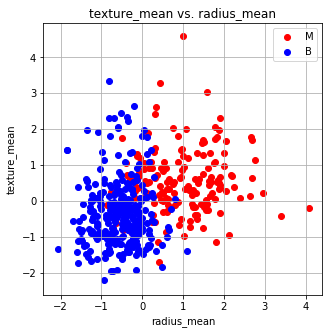

In [7]:
# let's see it
plot_trainset(x_train, y_train)

In [16]:
from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
# linear SVM using Scikit-Learn
# let's create several classifiers with different C's
svm_clf_1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf_10 = LinearSVC(C=10, loss="hinge", random_state=42)
svm_clf_100 = LinearSVC(C=100, loss="hinge", random_state=42)
svm_clf_1000 = LinearSVC(C=1000, loss="hinge", random_state=42)

In [19]:
# fit (train)
svm_clf_1.fit(x_train, y_train)
svm_clf_10.fit(x_train, y_train)
svm_clf_100.fit(x_train, y_train)
svm_clf_1000.fit(x_train, y_train)

LinearSVC(C=1000, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=42, tol=0.0001, verbose=0)

In [20]:
# predict
y_pred_1 = svm_clf_1.predict(x_test)
y_pred_10 = svm_clf_10.predict(x_test)
y_pred_100 = svm_clf_100.predict(x_test)
y_pred_1000 = svm_clf_1000.predict(x_test)

In [21]:
# calculate accuracy
accuracy_1 = np.sum(y_pred_1 == y_test) / len(y_test)
accuracy_10 = np.sum(y_pred_10 == y_test) / len(y_test)
accuracy_100 = np.sum(y_pred_100 == y_test) / len(y_test)
accuracy_1000 = np.sum(y_pred_1000 == y_test) / len(y_test)

In [22]:
print("svm C=1 accuracy: {:.3f} %".format(accuracy_1 * 100))
print("svm C=10 accuracy: {:.3f} %".format(accuracy_10 * 100))
print("svm C=100 accuracy: {:.3f} %".format(accuracy_100 * 100))
print("svm C=1000 accuracy: {:.3f} %".format(accuracy_1000 * 100))

svm C=1 accuracy: 90.351 %
svm C=10 accuracy: 89.474 %
svm C=100 accuracy: 91.228 %
svm C=1000 accuracy: 92.105 %


In [23]:
# Let's see the boundary
w = (svm_clf_100.coef_).reshape(-1,)
b = (svm_clf_100.intercept_).reshape(-1,)
boundary = (-b - w[0] * x_train[:, 0]) / w[1]

w_10 = (svm_clf_10.coef_).reshape(-1,)
b_10 = (svm_clf_10.intercept_).reshape(-1,)
boundary_10 = (-b_10 - w_10[0] * x_train[:, 0]) / w_10[1]

w_1000 = (svm_clf_1000.coef_).reshape(-1,)
b_1000 = (svm_clf_1000.intercept_).reshape(-1,)
boundary_1000 = (-b_1000 - w_1000[0] * x_train[:, 0]) / w_1000[1] 

In [24]:
def plot_svm_boundary():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_train[y_train,0], x_train[y_train, 1], color='r', label="M, train", alpha=0.5)
    ax.scatter(x_train[~y_train,0], x_train[~y_train, 1], color='b', label="B, train", alpha=0.5)
    ax.scatter(x_test[y_test,0], x_test[y_test, 1], color='r', label="M, test", alpha=1)
    ax.scatter(x_test[~y_test,0], x_test[~y_test, 1], color='b', label="B, test", alpha=1)
    ax.plot(x_train[:,0], boundary_10, label="SVM decision boundary C=10", color='m')
    ax.plot(x_train[:,0], boundary, label="SVM decision boundary C=100", color='g')
    ax.plot(x_train[:,0], boundary_1000, label="SVM decision boundary C=1000", color='y')
    ax.legend()
    ax.grid()
    ax.set_ylim([-4, 4])
    ax.set_xlabel("radius_mean")
    ax.set_ylabel("texture_mean")
    ax.set_title("texture_mean vs. radius_mean")

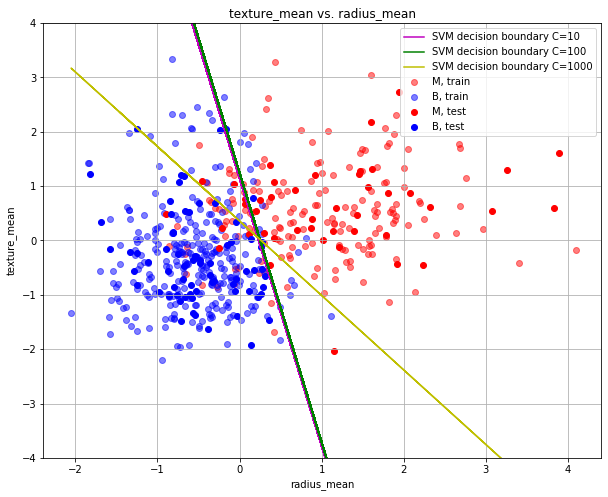

In [25]:
plot_svm_boundary()

## <img src="https://img.icons8.com/dusk/64/000000/toggle-on.png" style="height:50px;display:inline"> The Dual Problem
---
* The constrained optimization problem we solved is called *the primal problem*. It is possible to express a different but closely related problem called ***the dual problem***.
* The solution to the dual problem is usually a lower bound to the solution of the primal problem, but under some conditions, the solution is the same. This is the case for SVM! (as it meets these conditions).
    * You can choose whether to solve the primal or the dual problem.
    * As we will soon see, for nonlinear SVM with kernels, the dual problem formulation will come in handy.

* Recap of the original problem: $$ \underset{w, b}{\text{minimize}} \text{   } \frac{1}{2}||w||^2 = \frac{1}{2} w^Tw $$ $$ \text{subject to } y^{(i)}\big( w^Tx^{(i)} +b \big) \geq 1, \text{ for } i = 1,...,m $$
    * **The Lagrangian**: $$ \mathcal{L} = \frac{1}{2}w^Tw - \sum_{i=1}^m \alpha^{(i)} \big(y^{(i)}(w^Tx^{(i)} + b) -1 \big), \alpha^{(i)} \geq 0, \text{ for } i=1,2,...,m $$
        * Setting the gradient of $\mathcal{L}$ w.r.t. $w, b$ to zero, we get: $$ w +\sum_{i=1}^m \alpha^{(i)}(-y^{(i)}) x^{(i)} = 0 \rightarrow w = \sum_{i=1}^m \alpha^{(i)}y^{(i)} x^{(i)} $$ $$ \sum_{i=1}^m \alpha^{(i)} y^{(i)} = 0 $$

#### The Dual Problem

* If we plug-in the solution for w in $\mathcal{L}$, $w = \sum_{i=1}^m \alpha^{(i)}y^{(i)} x^{(i)} $ , we get: $$ \mathcal{L} = \frac{1}{2} \sum_{i=1}^m \big(\alpha^{(i)}y^{(i)} x^{(i)}\big)^T \sum_{j=1}^m \big(\alpha^{(j)}y^{(j)} x^{(j)}\big) +\sum_{i=1}^m \alpha^{(i)} \big( 1 - y^{(i)}(\sum_{j=1}^m\alpha^{(j)}y^{(j)}(x^{(j)})^T x^{(i)} +b) \big) = $$ $$ \frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)} y^{(i)} y^{(j)} (x^{(i)})^Tx^{(j)} + \sum_{i=1}^m \alpha^{(i)} -\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)} y^{(i)} y^{(j)} (x^{(i)})^Tx^{(j)} - b \sum_{i=1}^m \alpha^{(i)} y^{(i)} = $$ $$ -\frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)} y^{(i)} y^{(j)} (x^{(i)})^Tx^{(j)} + \sum_{i=1}^m \alpha^{(i)} $$
    * Note that $\sum_{i=1}^m \alpha^{(i)}y^{(i)} = 0$ from the constraint (see the gradient of $\mathcal{L}$ above)
    * This is a function of $\alpha^{(i)}$ only
    * The objective of the dual problem needs to be **maximized**!
        * Alternatively, we can **minimize** $-\mathcal{L}$

* Formally, the dual problem formulation: $$ \underset{\alpha}{\text{minimize}} \text{   } \frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)} y^{(i)} y^{(j)} (x^{(i)})^Tx^{(j)} - \sum_{i=1}^m \alpha^{(i)} $$ $$ \text{subject to } \sum_{i=1}^m \alpha^{(i)} y^{(i)} =0,\alpha^{(i)} \geq 0, \text{ for } i = 1,...,m $$
    * This is a quadratic programming (QP) problem - a global maximum of $\alpha^{(i)}$ can always be found.
* With **soft-margin**:
$$ \underset{\alpha}{\text{minimize}} \text{   } \frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)} y^{(i)} y^{(j)} (x^{(i)})^Tx^{(j)} - \sum_{i=1}^m \alpha^{(i)} $$ $$ \text{subject to } \sum_{i=1}^m \alpha^{(i)} y^{(i)} =0,0 \leq\alpha^{(i)} \leq C, \text{ for } i = 1,...,m $$

* **The Solution**: $$ w^{*} = \sum_{i=1}^m \alpha^{(i)}y^{(i)} x^{(i)} $$
    * Computing the bias term $b$: once you find the optimal $\alpha$, you can compute $w^{*}$ using the equation above. To compute $b^{*}$, you can use the fact that a **support vector must verify** $y^{(i)}(w^{*T}x^{(i)} + b^{*}) = 1$, so if the $k^{th}$ instance is a support vector ($\alpha^{(k)} > 0$), you can use it to compute $b^{*} = y^{(k)} - w^{*T}x^{(k)}$. However, to get a more stabilized result, it is often prefered to compute the average over all the support vectors to get a more stable result: $$ b^{*} = \frac{1}{n_s} \sum_{i=1, \alpha^{(i)} > 0}^m[y^{(i)} - w^{*T}x^{(i)}] $$
        * $n_s$ is the number of support vectors

* Important Notes:
    * The dual problem is **faster** to solve than the primal when the number of *training instances* is **smaller** than the *number of features*.
        * In Scikit-Learn, the `dual=True/False`: "dual : bool, (default=True) - select the algorithm to either solve the dual or primal optimization problem. Prefer `dual=False` when `n_samples > n_features`."
    * The dual problem makes the **kernel trick** possible while the primal does not.

## <img src="https://img.icons8.com/dusk/64/000000/average-value.png" style="height:50px;display:inline"> Nonlinear SVM - Kernel SVM
---
* Linear SVMs are efficient and work quite well in many cases.
* However, many problems are not linearly separable!
    * One approach to handling nonlinear datasets is to add more feature (e.g. polynomial features), we may help transform the problem to be "more linear".
* Consider the following example of linearly inseparatable 1-D set of exmaples and then extracting polynimial (second order) features:

In [26]:
def plot_toy_example():
    x_1 = np.random.randint(0,6, size=(3,))
    x_2 = np.random.randint(8,14, size=(3,))
    x_3 = np.random.randint(20,25, size=(3,))

    x_1_p = x_1 ** 2
    x_2_p = x_2 ** 2
    x_3_p = x_3 ** 2

    x_class = np.linspace(0, 30, 400)
    y_class = 25 * x_class - 130

    fig = plt.figure(figsize=(8,5))
    ax_1 = fig.add_subplot(211)
    ax_1.scatter(x_1, np.zeros_like(x_1), marker='*', color='b')
    ax_1.scatter(x_2, np.zeros_like(x_2), marker='^', color='r')
    ax_1.scatter(x_3, np.zeros_like(x_3), marker='*', color='b')
    ax_1.grid()
    ax_2 = fig.add_subplot(212)
    ax_2.scatter(x_1, x_1_p, marker='*', color='b')
    ax_2.scatter(x_2, x_2_p, marker='^', color='r')
    ax_2.scatter(x_3, x_3_p, marker='*', color='b')
    ax_2.plot(x_class, y_class)
    ax_2.grid()

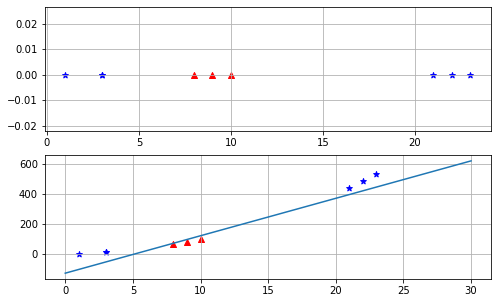

In [27]:
plot_toy_example()

* Adding polynomial features is simple to implement and can work great with all sorts of ML algorithms.
* At a **low polynomial** degree it cannot deal with more complex datasets.
* At a **high polynomial** degree there are a lot of features, which makes the computation very slow.
    * Computation in the feature space can be costly because it is high dimensional (even go to infinity).
* **The Kernel Trick** comes to the rescue!
    * It makes is possible to get the same result as if you added many features (even in high dimension), **without actually adding them**!
        * So there is no computational disaster resulting from the large number of features

## <img src="https://img.icons8.com/dusk/64/000000/fantasy.png" style="height:50px;display:inline"> The Kernel Trick
---
* Recall the **dual SVM problem** (soft-margin):  $$ \underset{\alpha}{\text{maximize}} \text{   } \sum_{i=1}^m \alpha^{(i)} - \frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)} y^{(i)} y^{(j)} (x^{(i)})^Tx^{(j)} $$ $$ \text{subject to } \sum_{i=1}^m \alpha^{(i)} y^{(i)} =0,0 \leq\alpha^{(i)} \leq C, \text{ for } i = 1,...,m $$
* Notice that the **data points**, $\{x^{(i)}\}_{i=1}^m$, only appear as **inner (dot) products** - $(x^{(i)})^Tx^{(j)}$!
* As long as we can calculate the inner product in the **feature space**, we don't need the mapping explicitly.
    * The kernel function, denoted $K(x^{(i)}, x^{(j)}) = \phi(x^{(i)})^T\phi(x^{(j)})$, stands for the inner product in the feature space, and can easily plugged into the optimization.
    * If we could find a function $K(x^{(i)}, x^{(j)})$ that is simple enough, we can actually save us the huge number of calculations required to calculate $\phi(x^{(i)})^T\phi(x^{(j)})$, or even prevent us from the feature extraction itself, $\phi(x)$, this is the **kernel trick**.

### <img src="https://img.icons8.com/office/80/000000/cool.png" style="height:50px;display:inline"> The Kernel Trick - Polynomial Kernel Example
---
* We will now demonstrate the kernel trick for a $2^{nd}$-degree polynomial mapping
* Suppose the feature mapping (or extraction) is defined as follows: $$ \phi(u)=\phi(\begin{bmatrix} u_1 \\ u_2 \end{bmatrix}) = \begin{bmatrix} 1 \\ \sqrt{2}u_1 \\ \sqrt{2}u_2\\ \sqrt{2}u_1u_2 \\ u_1^2 \\ u_2^2 \end{bmatrix} $$

* The inner product $\phi(u)^T\phi(v)$: $$\phi(u)^T\phi(v) = 1 + 2u_1v_1 + 2u_2v_2 + 2u_1u_2v_1v_2 +u_1^2v_1^2 + u_2^2v_2^2 = (1 + u_1v_1 + u_2v_2)^2 = (1 + u^Tv)^2$$
    * **HOW ABOUT THAT?** - We just found out that we can calculate $\phi(u)^T\phi(v)$ just by calculating the input inner product $u^Tv$ and plugging it in $(1 + u^Tv)^2$, thus saving us the whole feature mapping calculation process!
* We define **the $2^{nd}$ polynomial kernel**: $$ K(u,v) = (1 + u^Tv)^2 $$
    * No need to calculate $\phi(u)^T\phi(v)$ explicitly!
    * The use of kernel function to avoid computing $\phi(\cdot)$ explicitly is known as **the kernel trick**

### <img src="https://img.icons8.com/color/96/000000/transformer.png" style="height:50px;display:inline"> Other Kernel Functions
---
* Linear kernel: $$ K(u,v) = u^Tv $$
* Polynomial kernel with degree $d$: $$ K(u,v) = (\alpha u^Tv + \beta)^d $$
    * The feature space is all monomials up to degree $d$

* **Radial Basis Function** (Gaussian RBF) kernel with width $\sigma$: $$ K(u,v) = e^{-\frac{||u-v||^2}{2\sigma^2}} = e^{-\gamma|| u-v ||^2} = exp(-\gamma|| u-v ||^2) $$
    * It is also a type of a *similarity function* that measures *how far are two points?*
    * RBF covers the space with "balls" of a fixed radius, where the centers are the SVs
    * The radius of the "balls" is determined by the parameter $\gamma = \frac{1}{2\sigma^2}$
        * A **smaller** $\gamma$ means a larger radius, a lower "model complexity"
        * A **larger** $\gamma$ means a smaller radius, a finer grain coverage which may possibly lead to overfitting.
    * The feature space is **infinite-dimensional**
    * <img src="./assets/tut_11_rbf_kernel.png" style="height:200px">


<a href="https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/">Image Source</a>

* Sigmoid kernel, with parameters $\kappa$ and $\theta$: $$ K(u,v) = tanh(\kappa u^Tv + \theta) $$
    * It does not satisfy the *Mercer* condition on all $\kappa, \theta$

#### Which Kernel to Choose?
---
* As a rule of thumb, you should always try the **linear kernel** first
    * Especially if the training set is too large or has a lot of features
    * In Scikit-Learn, `LinearSVC` is much faster than `SVC(kernel="linear")`
* If the training set is not too large, try **Gaussian RBF**.
* If you are still not satisfied, you can try the others, possibly using cross-validation (and grid search for the best parameters).

### <img src="https://img.icons8.com/dusk/96/000000/exercise.png" style="height:50px;display:inline"> Training and Predicting Using Kernel SVM
---
* Training SVMs require the values $K(x^{(i)}, x^{(j)}), \forall i,j$
    * Where $x^{(i)}, x^{(j)}$ are the $i^{th}, j^{th}$ examples (vectors in the input space)
* There are no restrictions on the form of $x^{(i)}, x^{(j)}$, but there are restrictions on the kernel function $K(x^{(i)}, x^{(j)})$
    * $K(x^{(i)}, x^{(j)})$ must satisfy the **Mercer Condition** - the $n \times n$ kernel matrix $K(x^{(i)}, x^{(j)})$ is **positive definite**
    * This implies that the quadratic optimization is convex
        * It has a uniuqe solution and can be solved efficiently
* When we apply the *kernel trick*, we end up with equations that include $\phi(x^{(i)})$.
    * We know that $w^{*}$ must have the same dimensions as $\phi(x^{(i)})$, which may be huge or even infinite!

* Let's see how we can still train and make predictions, using the kernel trick again: $$ h_{w^{*}, b^{*}}(\phi(x^{(n)}) = w^{*T} \cdot \phi\big(x^{(n)} \big) + b^{*} = \bigg( \sum_{i=1}^m \alpha^{*(i)}y^{(i)}\phi\big(x^{(i)} \big) \bigg)^T \cdot \phi\big(x^{(n)} \big) + b^{*} $$ $$ = \sum_{i=1}^m \alpha^{*(i)}y^{(i)} \bigg(\phi\big(x^{(i)}\big)^T \cdot \phi\big(x^{(n)} \big) \bigg) + b^{*}$$ $$ = \sum_{i=1, \alpha^{*(i)} > 0}^m \alpha^{*(i)}y^{(i)} K\big(x^{(i)}, x^{(n)}\big) + b^{*} $$
    * Since $\alpha^{(i)} \neq 0$ only for **support vectors**, making predictions involves computing the dot product of new input vectors with only the support vectors and not all of the training instances.

* $b^{*}$ is also calculated in the same fashion: $$ b^{*} = \frac{1}{n_s} \sum_{i=1, \alpha^{*(i)} > 0}^m \bigg(1 - y^{(i)}w^{*T} \cdot \phi\big(x^{(i)} \big) \bigg) = \frac{1}{n_s} \sum_{i=1, \alpha^{*(i)} > 0}^m \bigg(1 - y^{(i)}\bigg(\sum_{j=1, \alpha^{*(i)} > 0}^m \alpha^{*(j)}y^{(j)}\phi\big( x^{(j)} \big) \bigg)^{*T} \cdot \phi\big(x^{(i)} \big) \bigg) $$ $$ = \frac{1}{n_s} \sum_{i=1, \alpha^{*(i)} > 0}^m \bigg(1 - y^{(i)}\sum_{j=1, \alpha^{*(i)} > 0}^m \alpha^{*(j)}y^{(j)}K\big( x^{(j)}, x^{(i)} \big) \bigg) $$

* The disadvantage of using Kernel SVM is the need to keep carrying the support vectors (cannot calculate $w$, need to keep the support vectors, the actual samples from the training set and their corresponding $\alpha$)
    * LinearSVM can be compressed to one feature vector, which is an advantage

## <img src="https://img.icons8.com/office/80/000000/virus.png" style="height:50px;display:inline"> Nonlinear SVM - Kernel SVM Example
---
* For Polynomial - the hyper-parameter `coef0` controls how much the model is influenced by high degree polynomials vs low-degree polynomial.

In [36]:
# helper function to plot conturs
# source: https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/
import warnings
from matplotlib.colors import ListedColormap

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, ax, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        ax.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [37]:
# nonlinear SVM using Scikit-Learn
# let's create several classifiers with different kerenls
svm_clf_poly = SVC(kernel="poly", degree=3, coef0=1, C=5, random_state=42)
svm_clf_rbf = SVC(kernel="rbf", gamma=10, C=1, random_state=42)

svm_clf_poly.fit(x_train, y_train)
svm_clf_rbf.fit(x_train, y_train)

y_pred_poly = svm_clf_poly.predict(x_test)
y_pred_rbf = svm_clf_rbf.predict(x_test)

accuracy_poly = np.sum(y_pred_poly == y_test) / len(y_test)
accuracy_rbf = np.sum(y_pred_rbf == y_test) / len(y_test)

print("svm with polynomial kernel accuracy: {:.3f} %".format(accuracy_poly * 100))
print("svm with RBF kernel accuracy: {:.3f} %".format(accuracy_rbf * 100))

svm with polynomial kernel accuracy: 92.105 %
svm with RBF kernel accuracy: 92.982 %


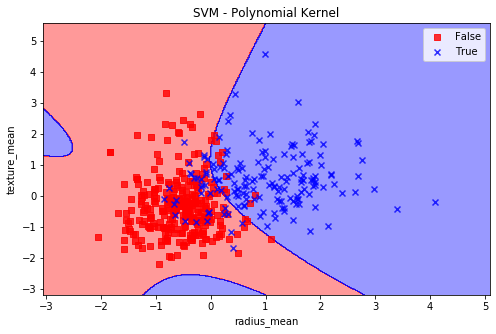

In [42]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,1,1)
plot_decision_regions(x_train, y_train, svm_clf_poly, ax)
ax.set_xlabel("radius_mean")
ax.set_ylabel("texture_mean")
ax.set_title("SVM - Polynomial Kernel")
ax.legend()

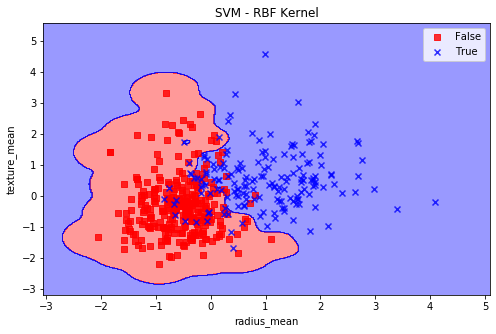

In [41]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,1,1)
plot_decision_regions(x_train, y_train, svm_clf_rbf, ax)
ax.set_xlabel("radius_mean")
ax.set_ylabel("texture_mean")
ax.set_title("SVM - RBF Kernel")
ax.legend()

## <img src="https://img.icons8.com/office/80/000000/details.png" style="height:50px;display:inline"> SVM Summary
---
* **SVM Pros**
    * Relatively few parameters to tune
    * SVM has theoretical foundations
    * Efficient training, global convergence
    * Sparse solution (otherwise it would not generalize well)
    * State-of-the-art (SOTA) performance on popular Machine Learning problems
* **SVM Cons**
    * Choosing the right kernel an "art"
        * See the guidelines in the previous section
    * There is a need to keep carrying the support vectors in Kernel SVM
        * Linear SVM has an advantage
    * From "Curse of Dimensionality" to large-scale problems

* SVM for **multi-class** classification:
    * Change the quadratic programming (QP) formulation to become multi-class
    * Combine multiple *binary* classifiers
        * Most common schemes: One-vs-Rest, One-vs-One
* Output probability from SVM:
    * Performing **Logistic Regression** on the SVM output of a set of data (test set) that is not used for training.
        * Read here - https://scikit-learn.org/stable/modules/svm.html#scores-probabilities
        * Built in Scikit-Learn (`svm_clf.predict_proba(test_set)`)

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* Support Vector Machine (SVM) - <a href="https://www.youtube.com/watch?v=_PwhiWxHK8o">MIT 6.034 Artificial Intelligence - Learning: Support Vector Machines</a>
    * <a href="https://www.youtube.com/watch?v=xpHQ6UhMlx4">Machine Learning Lecture 14 "(Linear) Support Vector Machines" -Cornell CS4780</a>
* The Kernel Trick - <a href="https://www.youtube.com/watch?v=JiM_LXpAtLc">Machine Learning Fundamentals - 7.2 - The Kernel Trick</a>
    * <a href="https://www.youtube.com/watch?v=N_r9oJxSuRs">The Kernel Trick</a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Based on slides by Shai Fine
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/
* Examples and code snippets were taken from <a href="http://shop.oreilly.com/product/0636920052289.do">"Hands-On Machine Learning with Scikit-Learn and TensorFlow"</a>